In [1]:
import os
import sys
sys.path.append(f'{os.getcwd()}/../../')
sys.path.append(f'{os.getcwd()}/analytic')

import numpy             as np
import matplotlib.pyplot as plt
import magritte.setup    as setup
import magritte.core     as magritte

In [2]:
dimension = 1
npoints   = 50
nrays     = 200
nspecs    = 5
nlspecs   = 1
nquads    = 11

r_in   = 1.0E13   # [m]
r_out  = 7.8E16   # [m]
rho_in = 2.0E13   # [m^-3]
X_mol  = 1.0E-6   # [.]
temp   = 20.0     # [K]
turb   = 150.00   # [.]


def rho (r):
    return rho_in * np.power(r_in/r, 2.0)

def abn (r):
    return X_mol * rho(r)


rs = np.logspace (np.log10(r_in), np.log10(r_out), npoints, endpoint=True)

modelFile = 'vanZadelhoff_1a_1D.hdf5'
lamdaFile = '../data/test.txt'


model = magritte.Model ()
model.parameters.set_spherical_symmetry(True)
model.parameters.set_pop_prec          (1.0e-6)
model.parameters.set_model_name        (modelFile)
model.parameters.set_dimension         (dimension)
model.parameters.set_npoints           (npoints)
model.parameters.set_nrays             (nrays)
model.parameters.set_nspecs            (nspecs)
model.parameters.set_nlspecs           (nlspecs)
model.parameters.set_nquads            (nquads)
model.parameters.n_off_diag = 0


model.geometry.points.position.set([[r, 0, 0] for r in rs])
model.geometry.points.velocity.set(np.zeros((npoints, 3)))

model.chemistry.species.abundance = [[     0.0, abn(r), rho(r),  0.0,      1.0] for r in rs]
model.chemistry.species.symbol    =  ['dummy0', 'test',   'H2', 'e-', 'dummy1']

model.thermodynamics.temperature.gas  .set( temp                 * np.ones(npoints))
model.thermodynamics.turbulence.vturb2.set((turb/magritte.CC)**2 * np.ones(npoints))

model = setup.set_Delaunay_neighbor_lists (model)
model = setup.set_Delaunay_boundary       (model)
model = setup.set_boundary_condition_CMB  (model)
model = setup.set_rays_spherical_symmetry (model)
model = setup.set_linedata_from_LAMDA_file(model, lamdaFile)
model = setup.set_quadrature              (model)

print(model.geometry.boundary.get_boundary_condition(0))

model.write()
model.read ()

model.compute_spectral_discretisation ()
model.compute_inverse_line_widths     ()
model.compute_LTE_level_populations   ()
# model.compute_level_populations       (False, 50)

BoundaryCondition.CMB


0

In [3]:
def max_relative_difference(a,b):
    return 2.0*np.max(np.abs((a-b)/(a+b)))

def mean_relative_difference(a,b):
    return 2.0*np.mean(np.abs((a-b)/(a+b)))

In [4]:
def Anderson_acc_gen(x , num_it, l):
    unit = np.ones(num_it-1)
    #Column vectors for U matrix but here we have row matrix
    U_transpose = []
    for i in range(0,num_it-1):
            U_transpose.append((x[i] - x[i+1]))
    U_transpose = np.array(U_transpose)       
    #multiply two matrix
    M = np.matmul(U_transpose, U_transpose.T)
    # l is regularisation coefficient  
    # inverse of U and U_T
#     print('max = ', np.max(npM))
    print('min = ', np.min(np.abs(M)))
    plt.figure(dpi=100)
    plt.imshow(M, vmin=0.0, vmax=1.0)
    plt.show()
    M = np.linalg.inv(M + l*np.identity(len(M)))
    # Normalizaton factor
    Norm = np.linalg.multi_dot([unit,M,unit])
    #coeeficients c's
    c = np.matmul(M,unit)
    c = c/Norm
    S_acc = 0
    for p in range(0,num_it-1):
        S_acc = S_acc + (c[p]*x[p+1])  
    return (S_acc,c)

After 0 iteration(s), max_diff = 0.6554549196361134338 mean_diff =  0.08243747343218746533
After 1 iteration(s), max_diff = 0.44265127049101847382 mean_diff =  0.056787170970788354998
min =  0.2287827529243051


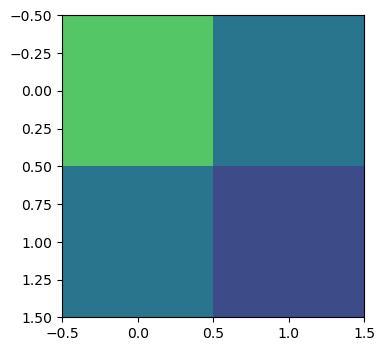

After 2 iteration(s), max_diff = 0.55574981350617440925 mean_diff =  0.08661764698329610293
min =  0.2287827529243051


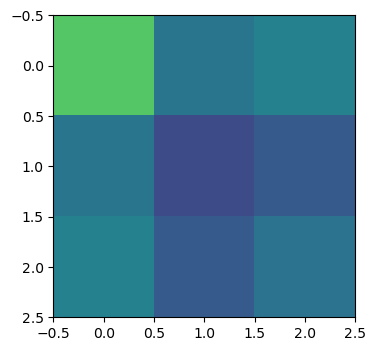

After 3 iteration(s), max_diff = 0.50431074933677755013 mean_diff =  0.09655548819159527308
min =  0.22878275292430506


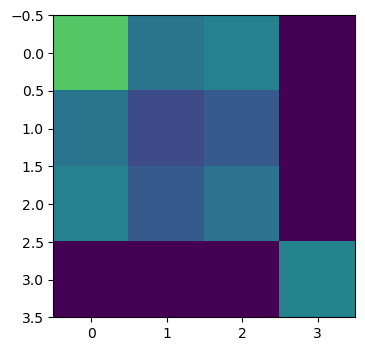

After 4 iteration(s), max_diff = 0.8798582243461564998 mean_diff =  0.15931628373839302272
min =  0.22878275292430506


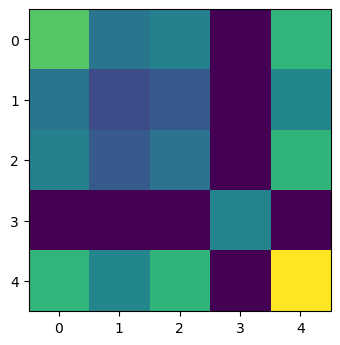

After 5 iteration(s), max_diff = 0.7306736969859994485 mean_diff =  0.11912585120244420316
min =  0.22878275292430506


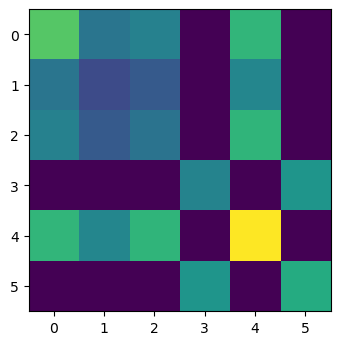

After 6 iteration(s), max_diff = 0.43112098542766521625 mean_diff =  0.08126531996420370285
min =  0.22878275292430506


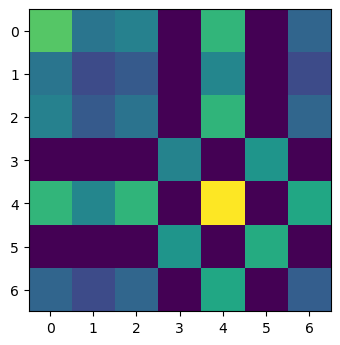

After 7 iteration(s), max_diff = 0.05397644325476256847 mean_diff =  0.007918549158523485023
min =  0.0021283107056286553


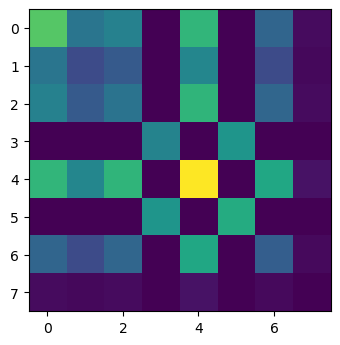

After 8 iteration(s), max_diff = 0.041960814775395291123 mean_diff =  0.003573381688333393365
min =  0.0004968559461731329


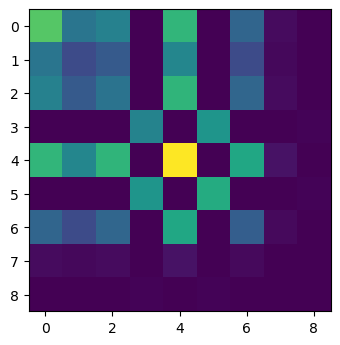

After 9 iteration(s), max_diff = 0.11546085320257517263 mean_diff =  0.022898045814623777182
min =  0.0004968559461731328


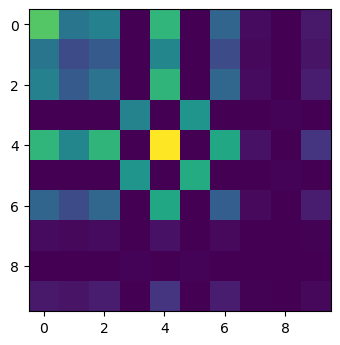

After 10 iteration(s), max_diff = 0.03051745967287566873 mean_diff =  0.0061923983264979413667
min =  0.00024804910961354


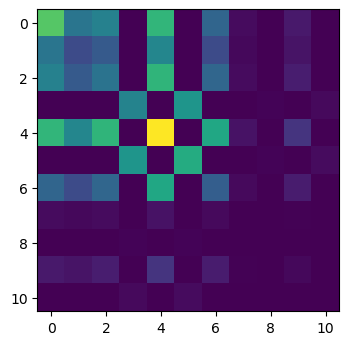

After 11 iteration(s), max_diff = 0.13870837701312935036 mean_diff =  0.027601325104316078041
min =  0.00024804910961354006


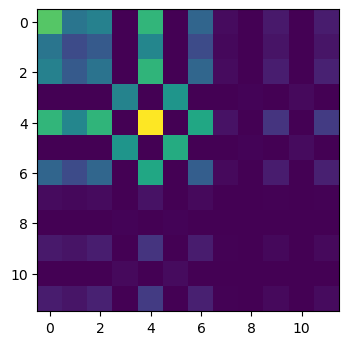

After 12 iteration(s), max_diff = 0.009153916801987148514 mean_diff =  0.001701203447138142172
min =  6.75525814191868e-05


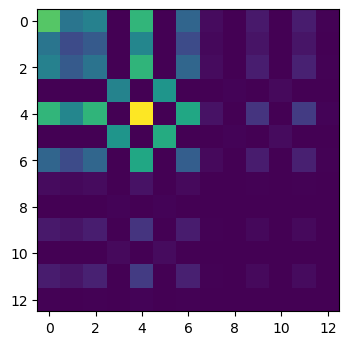

After 13 iteration(s), max_diff = 0.087200692290096584786 mean_diff =  0.018924988712668791073
min =  6.75525814191868e-05


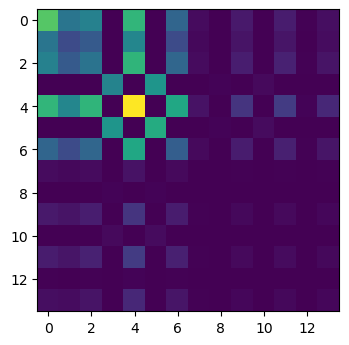

After 14 iteration(s), max_diff = 0.016205462513408011178 mean_diff =  0.0019483194593923142608
min =  6.75525814191868e-05


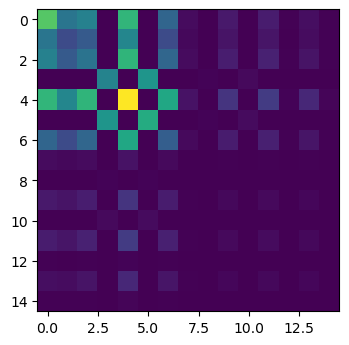

After 15 iteration(s), max_diff = 0.014220998677530727754 mean_diff =  0.0023686560502053390476
min =  8.25609152326184e-06


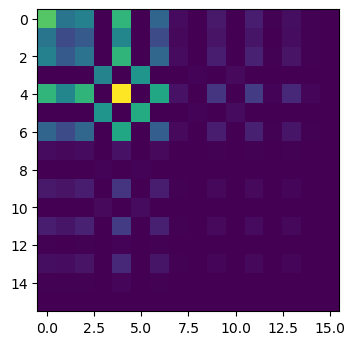

After 16 iteration(s), max_diff = 0.005211714205826190164 mean_diff =  0.00060946619315700118813
min =  8.256091523261646e-06


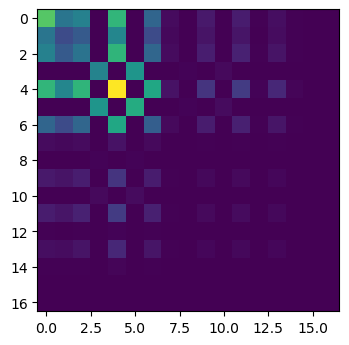

After 17 iteration(s), max_diff = 0.105572253510517149864 mean_diff =  0.022780171806877067616
min =  8.256091523261646e-06


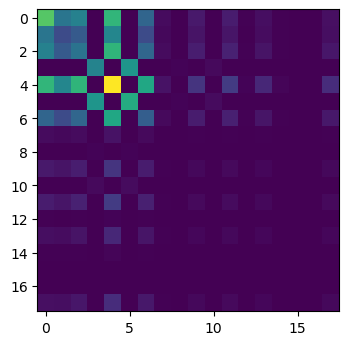

After 18 iteration(s), max_diff = 0.016804844586557905923 mean_diff =  0.0034906035247906761648
min =  2.4968726335296378e-06


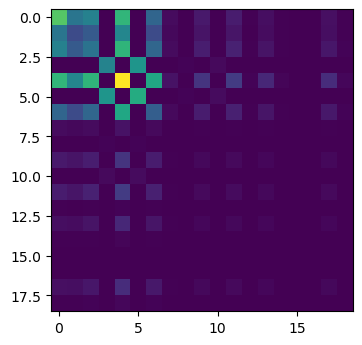

After 19 iteration(s), max_diff = 0.0048899227841581795988 mean_diff =  0.0007962490583217512835
min =  1.1474723497119524e-06


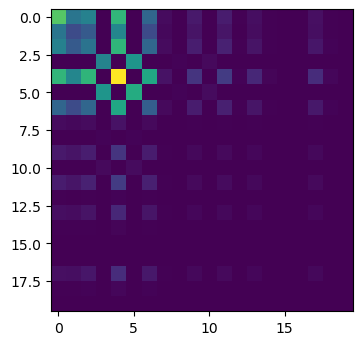

After 20 iteration(s), max_diff = 0.0015903811346901181062 mean_diff =  0.00029128663701547598317
min =  5.154711325053496e-07


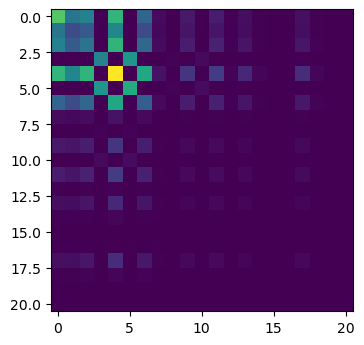

After 21 iteration(s), max_diff = 0.06662839396979054178 mean_diff =  0.014743607326421756647
min =  5.154711325053496e-07


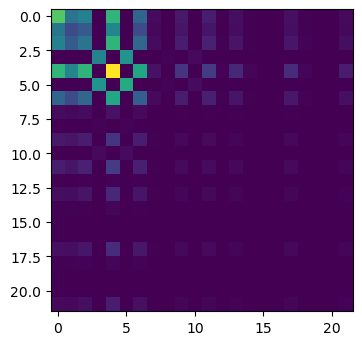

After 22 iteration(s), max_diff = 0.007773704395400763634 mean_diff =  0.0016725354975430047318
min =  5.154711325053496e-07


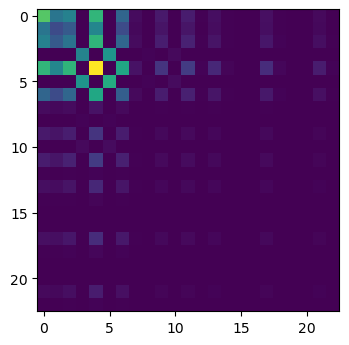

After 23 iteration(s), max_diff = 0.0006754562575532774796 mean_diff =  8.0958779887708207165e-05
min =  2.766833295130067e-07


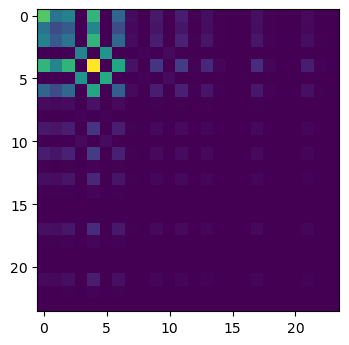

After 24 iteration(s), max_diff = 0.0033432288353896878885 mean_diff =  0.00066632595904251170927
min =  2.7668332951300664e-07


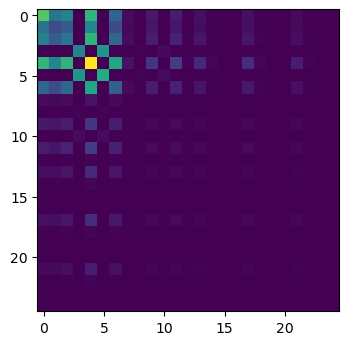

After 25 iteration(s), max_diff = 0.020787460625148530206 mean_diff =  0.004908564497304095419
min =  2.7668332951300664e-07


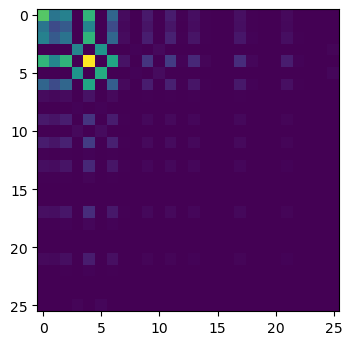

After 26 iteration(s), max_diff = 0.011155981999642248439 mean_diff =  0.0024651653057944364562
min =  2.7668332951300664e-07


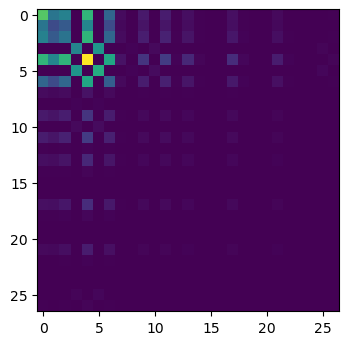

After 27 iteration(s), max_diff = 0.003553757216297388265 mean_diff =  0.0008733338257754462092
min =  2.7668332951300664e-07


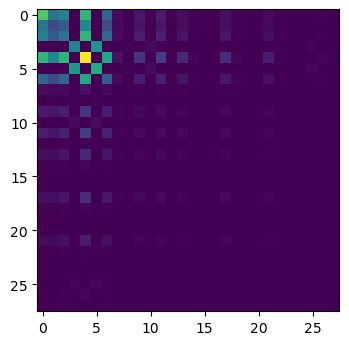

After 28 iteration(s), max_diff = 0.045205940429386549613 mean_diff =  0.010037664202677582966
min =  2.7668332951300664e-07


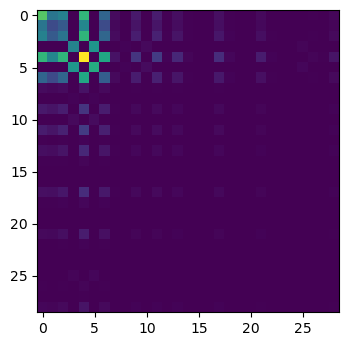

After 29 iteration(s), max_diff = 0.06147911325867360258 mean_diff =  0.013749680039411250502
min =  2.7668332951300664e-07


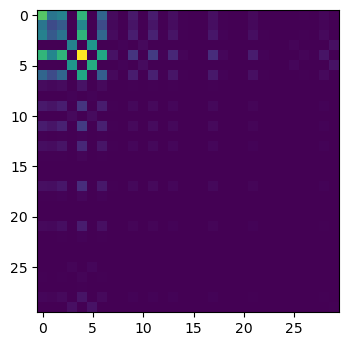

After 30 iteration(s), max_diff = 0.10584973061803173633 mean_diff =  0.023468298883099952755
min =  2.7668332951300664e-07


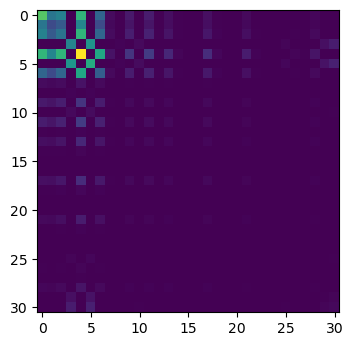

After 31 iteration(s), max_diff = 0.5582492536037290354 mean_diff =  0.11333798908461085718
min =  2.7668332951300664e-07


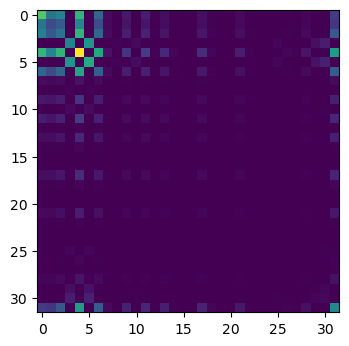

After 32 iteration(s), max_diff = 0.5349554596880868165 mean_diff =  0.109122803369289859
min =  2.7668332951300664e-07


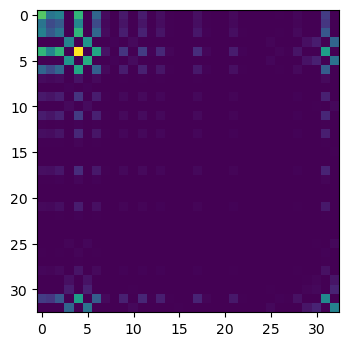

After 33 iteration(s), max_diff = 0.13817275966385520409 mean_diff =  0.034825431831138558464
min =  2.7668332951300664e-07


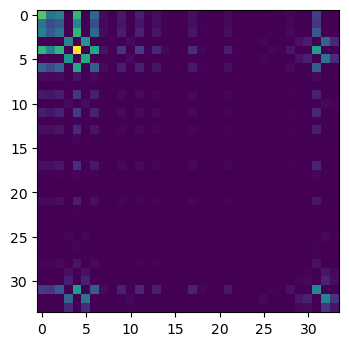

After 34 iteration(s), max_diff = 0.34385442991858109602 mean_diff =  0.08189909902131711475
min =  2.7668332951300664e-07


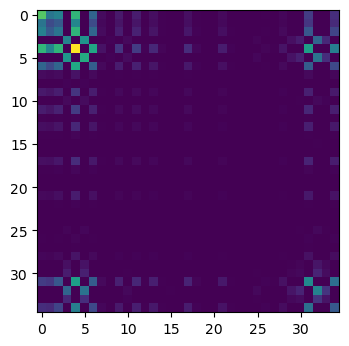

After 35 iteration(s), max_diff = 0.08052460896972293179 mean_diff =  0.016883038173896584353
min =  2.7668332951300664e-07


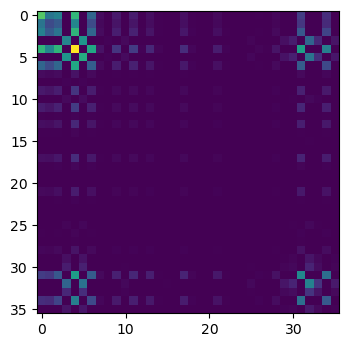

After 36 iteration(s), max_diff = 0.00523840829383096448 mean_diff =  0.0011755420235873613366
min =  2.7668332951300664e-07


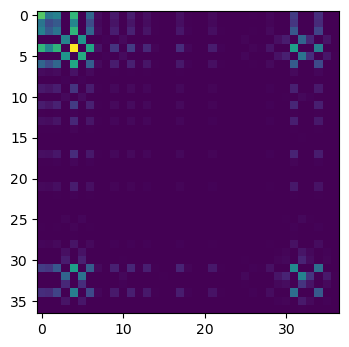

After 37 iteration(s), max_diff = 0.23338883149305151234 mean_diff =  0.05671184112560118339
min =  2.7668332951300664e-07


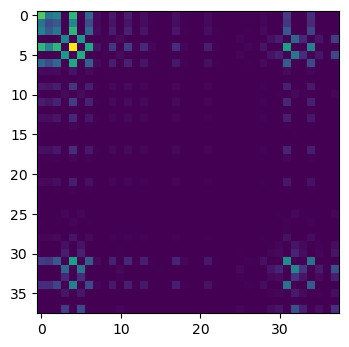

After 38 iteration(s), max_diff = 0.1309126568037704864 mean_diff =  0.032081215619153260504
min =  2.7668332951300664e-07


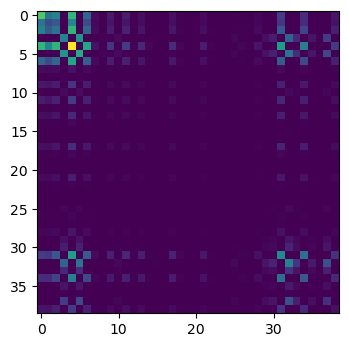

After 39 iteration(s), max_diff = 0.09565186866015039107 mean_diff =  0.02243296323430149144
min =  2.7668332951300664e-07


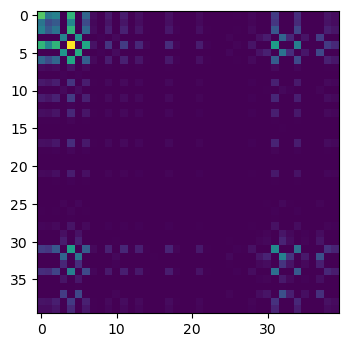

After 40 iteration(s), max_diff = 0.014862480360986500205 mean_diff =  0.0025698331890586875564
min =  2.7668332951300664e-07


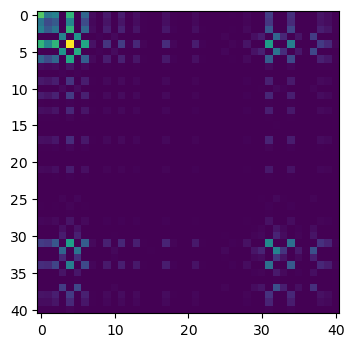

After 41 iteration(s), max_diff = 0.13642100887402856445 mean_diff =  0.033016327488639136116
min =  2.7668332951300664e-07


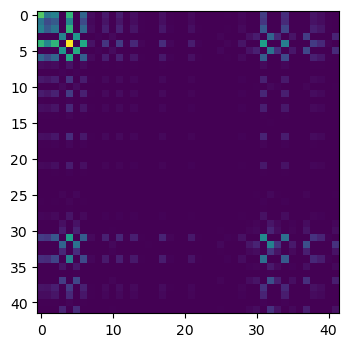

After 42 iteration(s), max_diff = 0.12539866658895216982 mean_diff =  0.030944870409465285862
min =  2.7668332951300664e-07


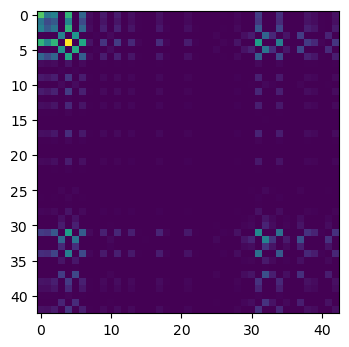

After 43 iteration(s), max_diff = 0.1754791746294644629 mean_diff =  0.04254463969044093392
min =  2.7668332951300664e-07


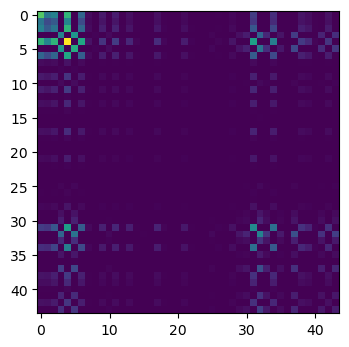

After 44 iteration(s), max_diff = 0.0047657691329426230296 mean_diff =  0.001306955845329063376
min =  2.7668332951300664e-07


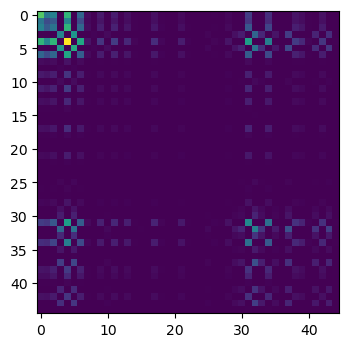

After 45 iteration(s), max_diff = 0.21038875493131391561 mean_diff =  0.049463500647424519656
min =  2.7668332951300664e-07


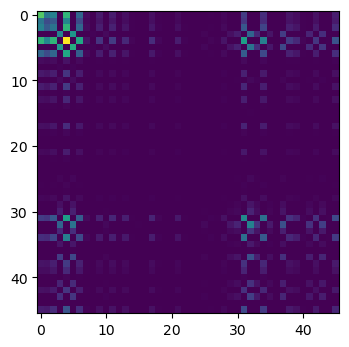

After 46 iteration(s), max_diff = 0.050088853148026587036 mean_diff =  0.011470565845655840567
min =  2.7668332951300664e-07


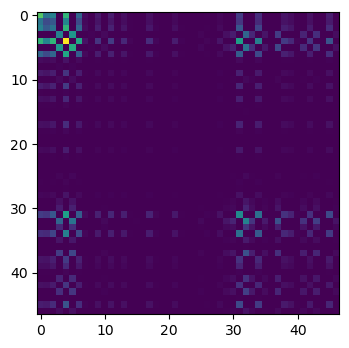

After 47 iteration(s), max_diff = 0.028101397409541619718 mean_diff =  0.0066492837323415068373
min =  2.7668332951300664e-07


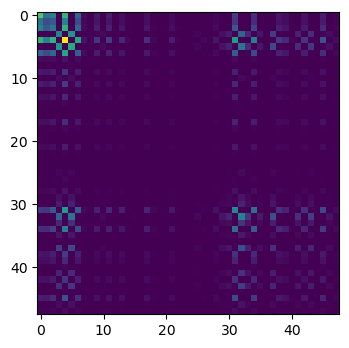

After 48 iteration(s), max_diff = 0.0040489630778141174463 mean_diff =  0.00081215223467656682545
min =  2.7668332951300664e-07


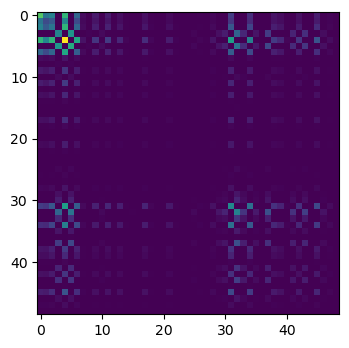

After 49 iteration(s), max_diff = 0.0029404342860309127442 mean_diff =  0.00064698289993809257194
min =  2.7668332951300664e-07


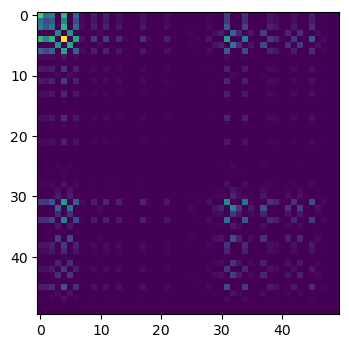

After 50 iteration(s), max_diff = 0.010501803650956905549 mean_diff =  0.0016471713564032873667
min =  2.7668332951300664e-07


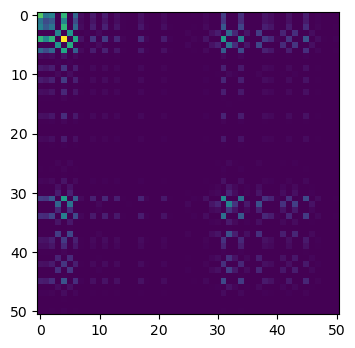

After 51 iteration(s), max_diff = 0.24019411607725396423 mean_diff =  0.05611869171368345826
min =  2.7668332951300664e-07


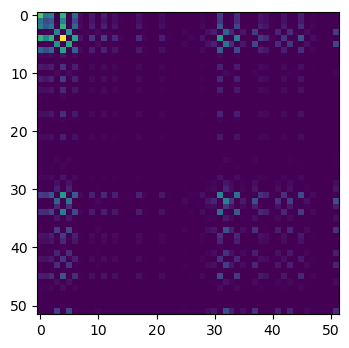

After 52 iteration(s), max_diff = 0.23663422312448418583 mean_diff =  0.055764104324193887038
min =  2.7668332951300664e-07


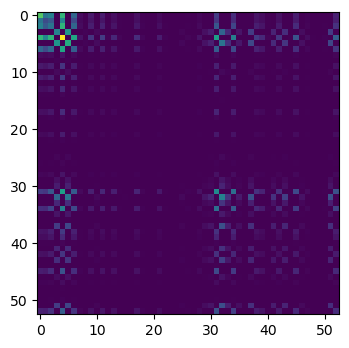

After 53 iteration(s), max_diff = 0.17330634166501736986 mean_diff =  0.036550717970966804954
min =  2.7668332951300664e-07


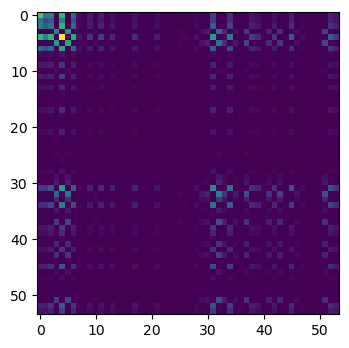

After 54 iteration(s), max_diff = 0.7338141887238979529 mean_diff =  0.19584483179941257399
min =  2.7668332951300664e-07


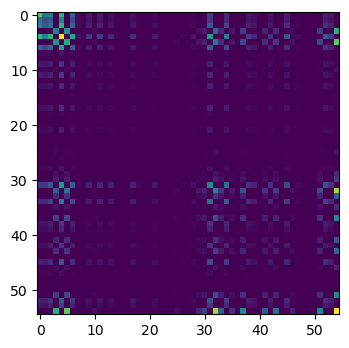

After 55 iteration(s), max_diff = 0.5911134781506645765 mean_diff =  0.16513658877282768208
min =  2.7668332951300664e-07


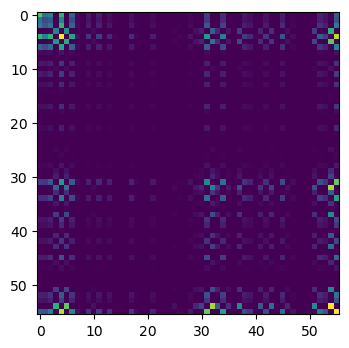

After 56 iteration(s), max_diff = 0.70336995708397675846 mean_diff =  0.20383371058792525676
min =  2.7668332951300664e-07


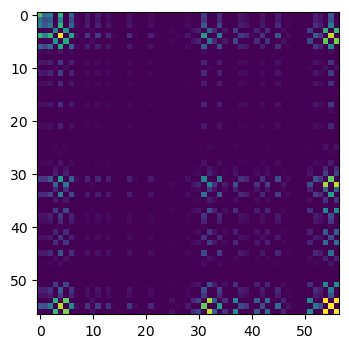

After 57 iteration(s), max_diff = 0.60525534343617376254 mean_diff =  0.17952575148992921845
min =  2.7668332951300664e-07


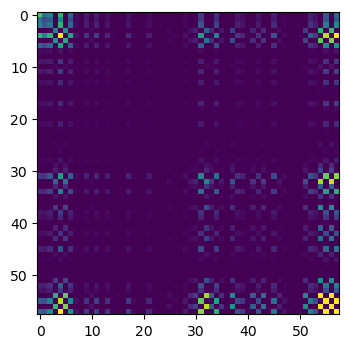

After 58 iteration(s), max_diff = 0.1940067248453933259 mean_diff =  0.04323026468900661313
min =  2.7668332951300664e-07


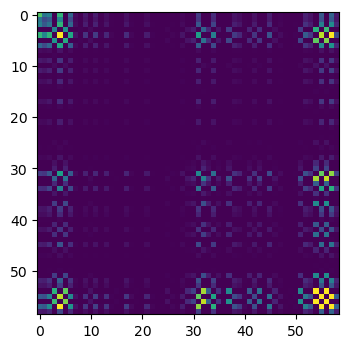

After 59 iteration(s), max_diff = 0.02957801389954643262 mean_diff =  0.0066212090937370325565
min =  2.7668332951300664e-07


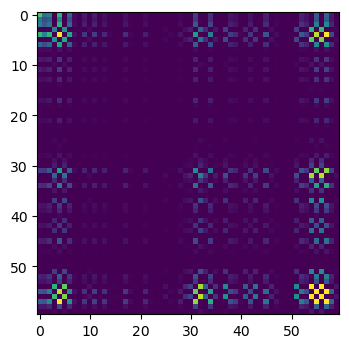

After 60 iteration(s), max_diff = 0.10828500417833083531 mean_diff =  0.023393903767963914543
min =  2.7668332951300664e-07


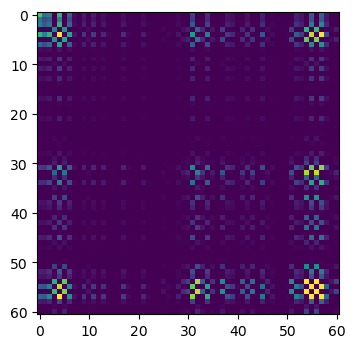

After 61 iteration(s), max_diff = 0.11127144984384480334 mean_diff =  0.02471613564454678587
min =  2.7668332951300664e-07


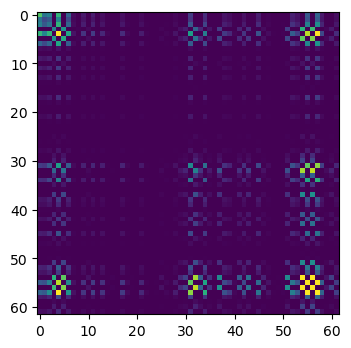

After 62 iteration(s), max_diff = 0.036182076870794025216 mean_diff =  0.007997027125302365137
min =  2.7668332951300664e-07


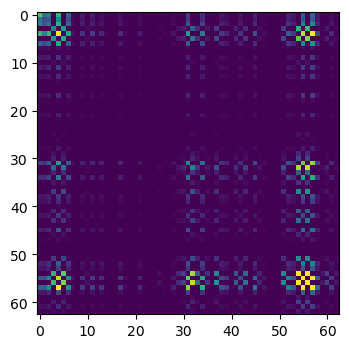

After 63 iteration(s), max_diff = 0.044439333971769524307 mean_diff =  0.009488966951583593125
min =  2.7668332951300664e-07


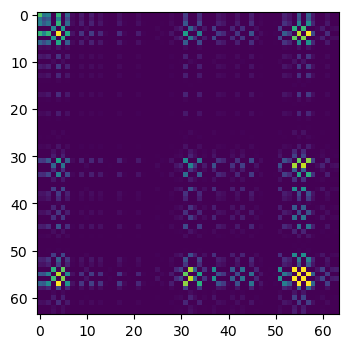

After 64 iteration(s), max_diff = 0.053410807685476628016 mean_diff =  0.01101262239646329066
min =  2.7668332951300664e-07


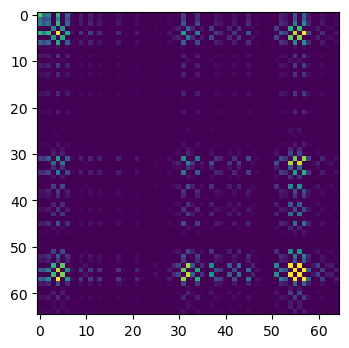

After 65 iteration(s), max_diff = 0.03652623927412042008 mean_diff =  0.0073917034436243813292
min =  2.7668332951300664e-07


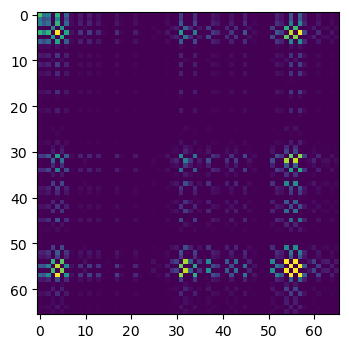

After 66 iteration(s), max_diff = 0.055696913447231025854 mean_diff =  0.0113508541000525367604
min =  2.7668332951300664e-07


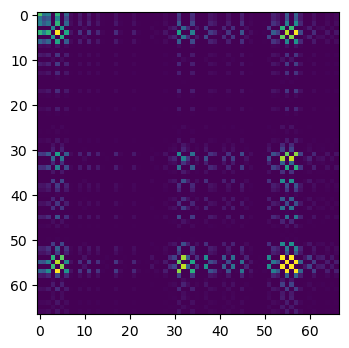

After 67 iteration(s), max_diff = 0.060341539777846078258 mean_diff =  0.012415165050310116565
min =  2.7668332951300664e-07


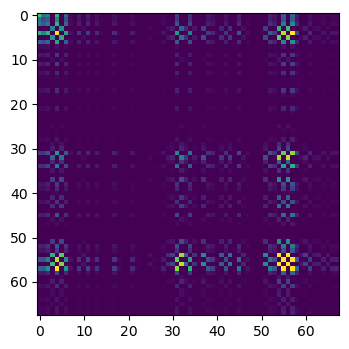

After 68 iteration(s), max_diff = 0.1482150488221647094 mean_diff =  0.030776769100897302829
min =  2.7668332951300664e-07


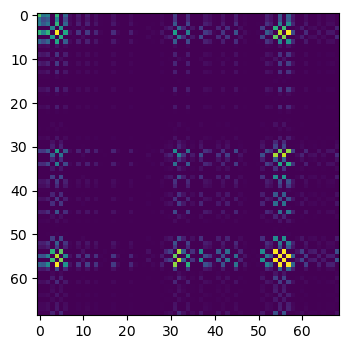

After 69 iteration(s), max_diff = 0.022646087266519117646 mean_diff =  0.0049433931198698630662
min =  2.7668332951300664e-07


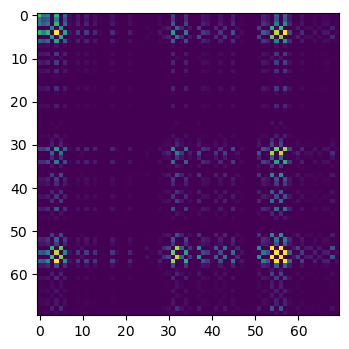

After 70 iteration(s), max_diff = 0.069011342019483060416 mean_diff =  0.01398118832828371526
min =  2.7668332951300664e-07


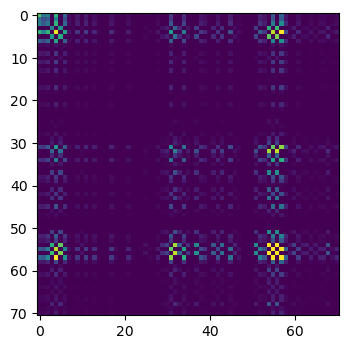

After 71 iteration(s), max_diff = 0.06592990419631315143 mean_diff =  0.013825980460792015107
min =  2.7668332951300664e-07


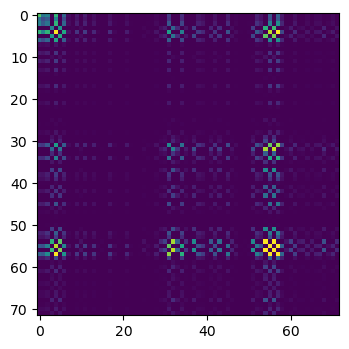

After 72 iteration(s), max_diff = 0.0269962854690004249 mean_diff =  0.00570252281411570964
min =  2.7668332951300664e-07


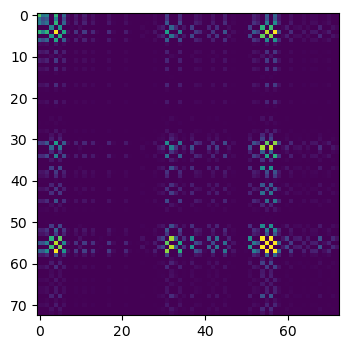

After 73 iteration(s), max_diff = 0.1318452355476906855 mean_diff =  0.027499158044602584889
min =  2.7668332951300664e-07


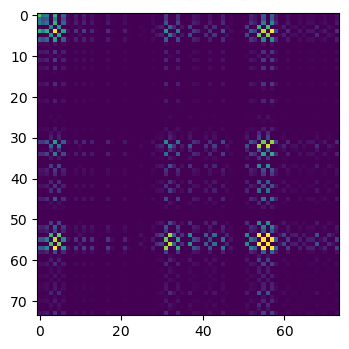

After 74 iteration(s), max_diff = 0.38090371754143243714 mean_diff =  0.09210413400116588893
min =  2.7668332951300664e-07


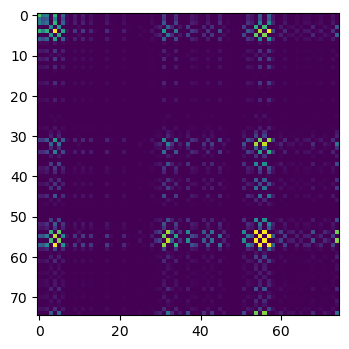

After 75 iteration(s), max_diff = 0.31390803841014679404 mean_diff =  0.078683381393759490094
min =  2.7668332951300664e-07


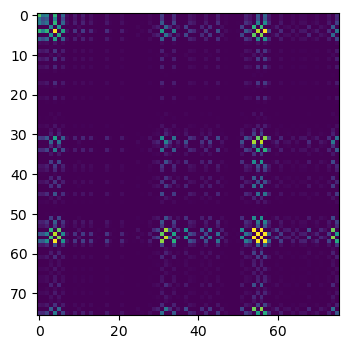

After 76 iteration(s), max_diff = 0.025133963538084373328 mean_diff =  0.0057999464884085456027
min =  2.7668332951300664e-07


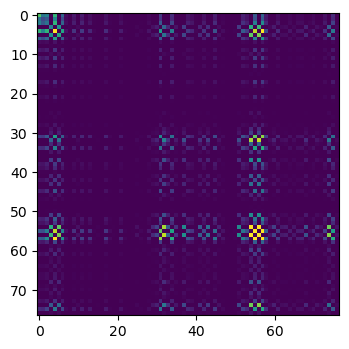

After 77 iteration(s), max_diff = 0.019337450037276988983 mean_diff =  0.0039357928642506818583
min =  2.7668332951300664e-07


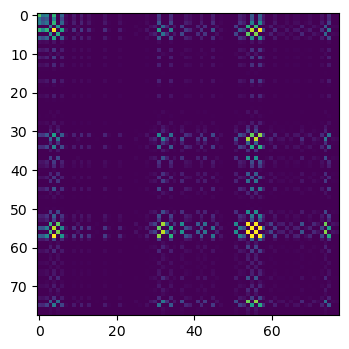

After 78 iteration(s), max_diff = 0.0066786883408562749016 mean_diff =  0.0015737735898143784076
min =  2.7668332951300664e-07


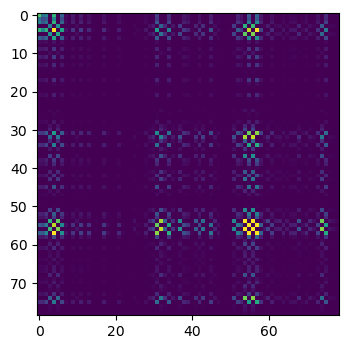

After 79 iteration(s), max_diff = 0.008178896952017898226 mean_diff =  0.0019317948446968010949
min =  2.7668332951300664e-07


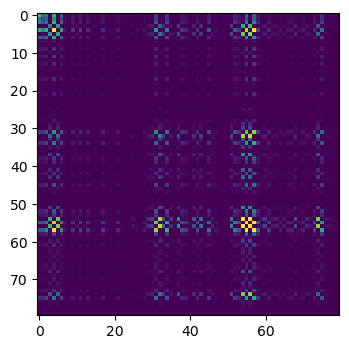

After 80 iteration(s), max_diff = 0.062337420679630611725 mean_diff =  0.013460416813479209809
min =  2.7668332951300664e-07


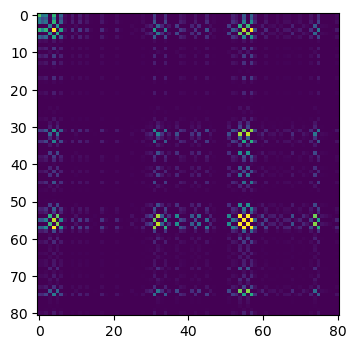

After 81 iteration(s), max_diff = 0.010172438037448469775 mean_diff =  0.0022306052934541397854
min =  2.7668332951300664e-07


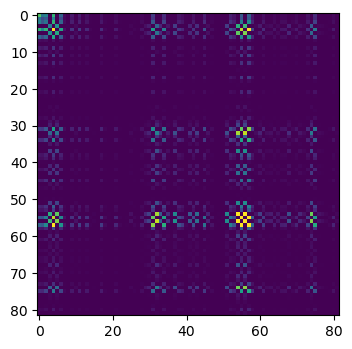

After 82 iteration(s), max_diff = 0.045792838544293066414 mean_diff =  0.009634962406520486831
min =  2.7668332951300664e-07


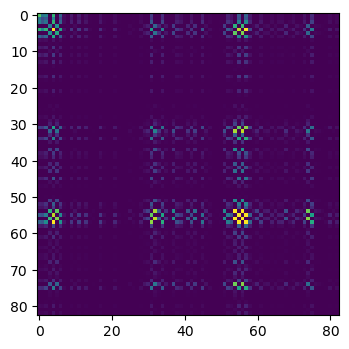

After 83 iteration(s), max_diff = 0.06366121877075065569 mean_diff =  0.013422374584731319689
min =  2.7668332951300664e-07


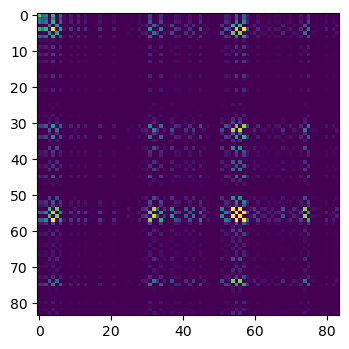

After 84 iteration(s), max_diff = 0.06674042130614446684 mean_diff =  0.0143626895699577166895
min =  2.7668332951300664e-07


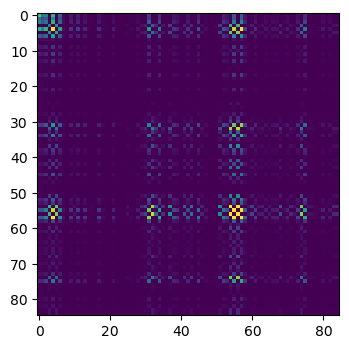

After 85 iteration(s), max_diff = 0.11914071248462229351 mean_diff =  0.02536525976388750622
min =  2.7668332951300664e-07


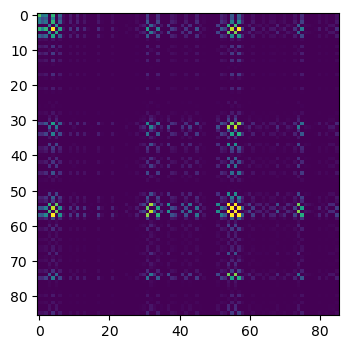

After 86 iteration(s), max_diff = 0.4686885491160960197 mean_diff =  0.1163482017320065445
min =  2.7668332951300664e-07


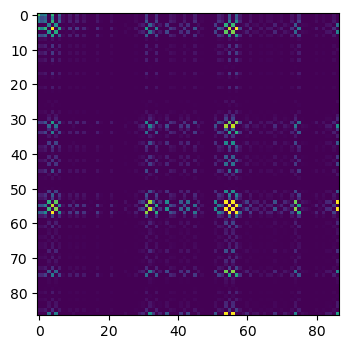

After 87 iteration(s), max_diff = 0.42983668994289953328 mean_diff =  0.107916015867626164235
min =  2.7668332951300664e-07


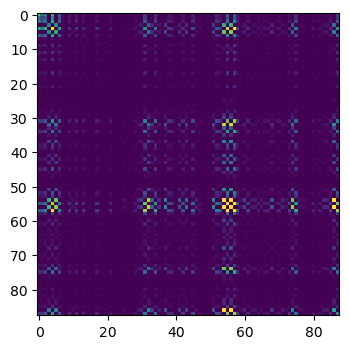

After 88 iteration(s), max_diff = 0.08186883717058379737 mean_diff =  0.016665886899270739017
min =  2.7668332951300664e-07


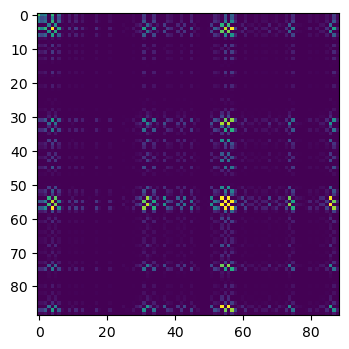

After 89 iteration(s), max_diff = 0.065013001587777357816 mean_diff =  0.0129169173304771472685
min =  2.7668332951300664e-07


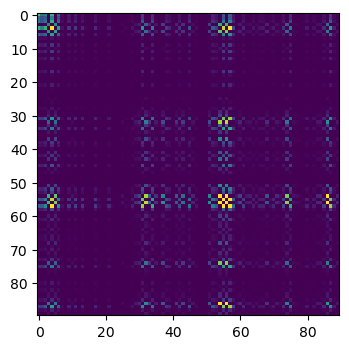

After 90 iteration(s), max_diff = 0.014075313727547733793 mean_diff =  0.0030041321902020282753
min =  2.7668332951300664e-07


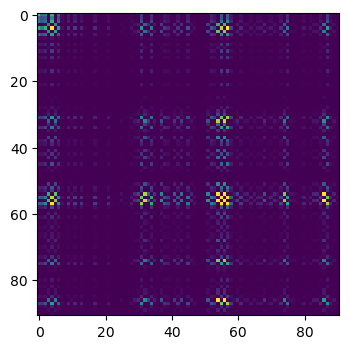

After 91 iteration(s), max_diff = 0.05674967160989741561 mean_diff =  0.013136378195474665526
min =  2.7668332951300664e-07


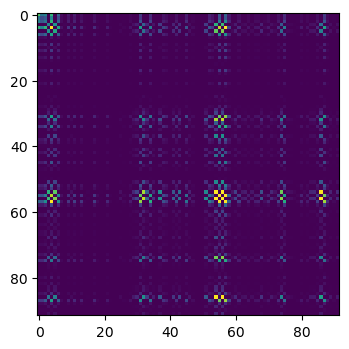

After 92 iteration(s), max_diff = 0.068960294599762181926 mean_diff =  0.015927870845308452212
min =  2.7668332951300664e-07


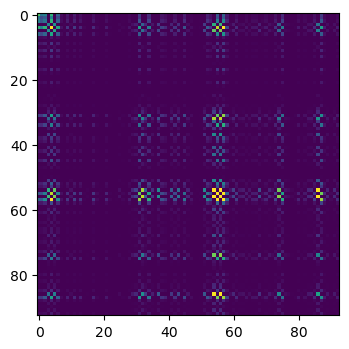

After 93 iteration(s), max_diff = 0.022579307688834393502 mean_diff =  0.005030772865269641898
min =  2.7668332951300664e-07


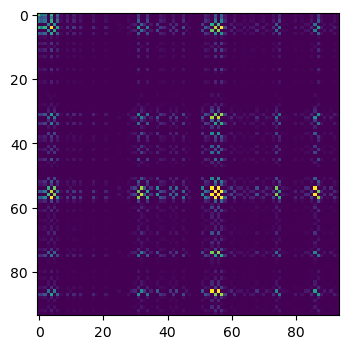

After 94 iteration(s), max_diff = 0.03221844480290567774 mean_diff =  0.00724539560567126374
min =  2.7668332951300664e-07


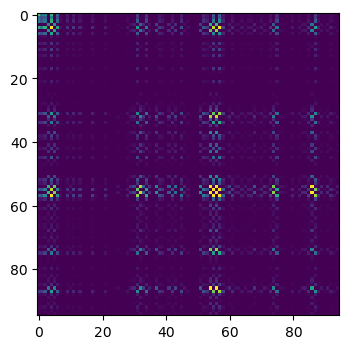

After 95 iteration(s), max_diff = 0.08651575677859628197 mean_diff =  0.018849839803091911992
min =  2.7668332951300664e-07


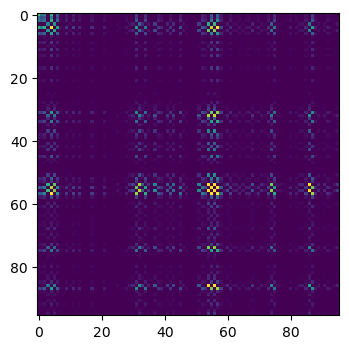

After 96 iteration(s), max_diff = 0.18962472706592877553 mean_diff =  0.03884066815835159651
min =  2.7668332951300664e-07


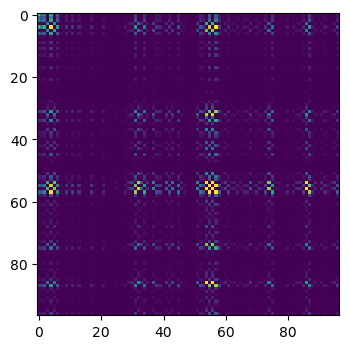

After 97 iteration(s), max_diff = 0.35130776304965132063 mean_diff =  0.07834154315276261701
min =  2.7668332951300664e-07


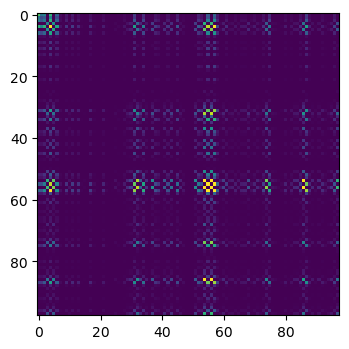

After 98 iteration(s), max_diff = 0.20134379444597797619 mean_diff =  0.04763885564046285681
min =  2.7668332951300664e-07


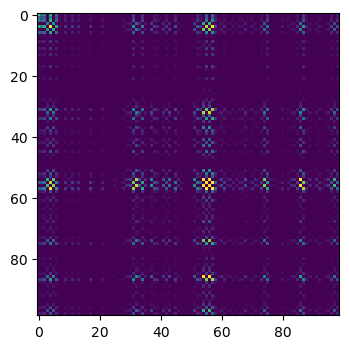

After 99 iteration(s), max_diff = 0.17849083120107286125 mean_diff =  0.03682608484993341575


In [5]:
Nmax = 100
nlev = model.lines.lineProducingSpecies[0].linedata.nlev
abn  = np.array(model.chemistry.species.abundance, dtype=np.float64)[:,1]
it_diff = []
pops = []
difs = []
#LTE Level population
pop  = np.copy(model.lines.lineProducingSpecies[0].population)
pops.append((pop.reshape((npoints,nlev)).T/abn).T.ravel())b
#order of Anderson acc and regularization coefficient
m = 1
l = 0#1.0e-18
Coefficients = []
for it in range(Nmax):
    # Compute radiation field and resulting populations
    if  it>=2: 
        A = []
        num_iterates = (m+2)
        for p in range(0,num_iterates):
            A.append(np.array(pops[p] , dtype = np.float64))
        S_acc , c = Anderson_acc_gen(A, num_iterates , l)
        Coefficients.append(c)
        model.lines.lineProducingSpecies[0].population = (S_acc.reshape((npoints,nlev)).T*abn).T.ravel()
        model.lines.set_emissivity_and_opacity()
        model.compute_radiation_field_feautrier_order_2()
        model.compute_Jeff()
        model.compute_level_populations_from_stateq()
        # Compute the maximum relative change
        pop = np.copy(model.lines.lineProducingSpecies[0].population)
        m = m+1
    else:
        model.compute_radiation_field_feautrier_order_2()
        model.compute_Jeff()
        model.compute_level_populations_from_stateq()
        # Compute the maximum relative change
        pop = np.copy(model.lines.lineProducingSpecies[0].population)
    pops.append((pop.reshape((npoints,nlev)).T/abn).T.ravel())
    
    difs.append(2.0*(pops[-1] - pops[-2])/(pops[-1] + pops[-2]))
    max_diff = max_relative_difference(pops[-1], pops[-2])
    mean_diff = mean_relative_difference(pops[-1], pops[-2])
    it_diff.append(max_diff)
    # Check for convergence
    if (max_diff < 1.0e-6):
        break
    print('After', it, 'iteration(s), max_diff =', max_diff, 'mean_diff = ', mean_diff)

In [6]:
from ipywidgets import widgets

In [7]:
len(difs)

100

In [8]:
def plot(i):
    plt.figure(dpi=110)
    plt.plot(difs[i].reshape((npoints,nlev))[:,0])
#     plt.ylim((-1.5,1.5))
    
widgets.interactive(plot, i=(0,99))

interactive(children=(IntSlider(value=49, description='i', max=99), Output()), _dom_classes=('widget-interact'…

In [5]:
pops = np.array(model.lines.lineProducingSpecies[0].population).reshape((model.parameters.npoints(), 2))
abun = np.array(model.chemistry.species.abundance)[:,1]
rs   = np.linalg.norm(np.array(model.geometry.points.position), axis=1)

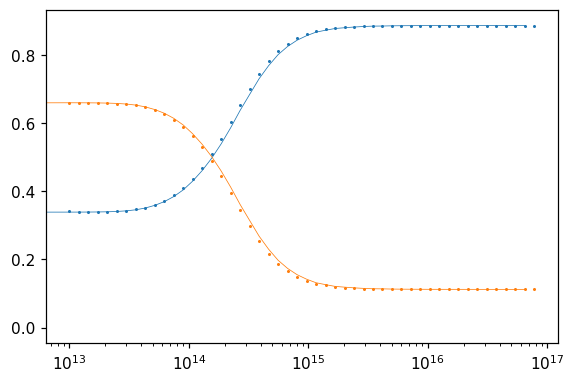

In [33]:
pop = pops[100].reshape((model.parameters.npoints(), 2))

plt.figure(dpi=110)
plt.scatter(rs, pop[:,0], s=1)
plt.scatter(rs, pop[:,1], s=1)

(i,ra,rb,nh,tk,nm,vr,db,td,lp0,lp1) = np.loadtxt ('numeric/Ratran_results/vanZadelhoff_1a.out', skiprows=14, unpack=True)
plt.plot(ra, lp0, linewidth=0.5)
plt.plot(ra, lp1, linewidth=0.5)

plt.xscale('log')

In [7]:
from scipy.interpolate import interp1d

In [8]:
interp_0 = interp1d(0.5*(ra+rb), lp0, fill_value='extrapolate')
interp_1 = interp1d(0.5*(ra+rb), lp1, fill_value='extrapolate')

In [9]:
np.max(pops[:,0]/abun - interp_0(rs))

0.058702374797854419775

In [10]:
pops[:,1]/abun - interp_1(rs)

array([ 1.08442490e-01, -3.75472237e-04, -2.52684948e-04, -3.09905790e-04,
       -4.96233015e-04, -8.66222502e-04, -1.51687380e-03, -2.59584302e-03,
       -4.15688244e-03, -6.17231497e-03, -8.95582911e-03, -1.25637069e-02,
       -1.67939365e-02, -2.13493130e-02, -2.64486153e-02, -3.26697185e-02,
       -3.89608429e-02, -4.37605506e-02, -4.53926183e-02, -4.50315365e-02,
       -4.23952545e-02, -3.66390969e-02, -3.01642881e-02, -2.34683344e-02,
       -1.78730134e-02, -1.29816588e-02, -8.70850307e-03, -5.73832015e-03,
       -3.95243129e-03, -2.56803942e-03, -2.05082264e-03, -1.33612216e-03,
       -7.21838498e-04, -5.01024058e-04, -4.25098114e-04, -1.91255035e-04,
       -1.15842463e-04, -7.31856402e-05, -5.85990545e-06,  3.90375933e-05,
        3.62241206e-05,  3.91542220e-05,  4.54677327e-05,  5.90507585e-05,
        7.03191281e-05,  7.07786059e-05,  7.18180569e-05,  7.12026592e-05,
        7.27199855e-05,  7.20841274e-05], dtype=float128)

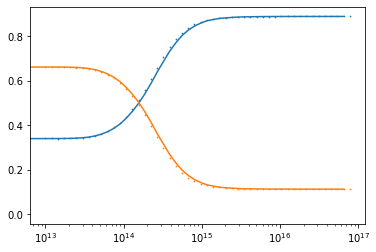

In [11]:
plt.scatter(rs, pops[:,0]/abun, s=0.5)
plt.scatter(rs, pops[:,1]/abun, s=0.5)

plt.plot(ra, lp0)
plt.plot(ra, lp1)


plt.xscale('log')
# plt.yscale('log')

In [7]:
pops = np.array(model.lines.lineProducingSpecies[0].population).reshape((model.parameters.npoints(), 2))
abun = np.array(model.chemistry.species.abundance)[:,1]
r    = np.linalg.norm(np.array(model.geometry.points.position), axis=1)

In [8]:
(i,ra,rb,nh,tk,nm,vr,db,td,lp0,lp1) = np.loadtxt ('numeric/vanZadelhoff_1a.out', skiprows=14, unpack=True)

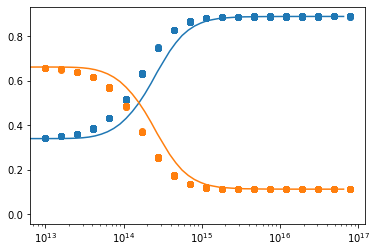

In [12]:
plt.scatter(r, pops[:,0]/abun)
plt.scatter(r, pops[:,1]/abun)

plt.plot(ra, lp0)
plt.plot(ra, lp1)


plt.xscale('log')
# plt.yscale('log')

In [3]:
pops = np.array(model.lines.lineProducingSpecies[0].population).reshape((model.parameters.npoints(), 2))
abun = np.array(model.chemistry.species.abundance)[:,1]
r    = np.linalg.norm(np.array(model.geometry.points.position), axis=1)

In [4]:
(i,ra,rb,nh,tk,nm,vr,db,td,lp0,lp1) = np.loadtxt ('numeric/Ratran_results/vanZadelhoff_1a.out', skiprows=14, unpack=True)

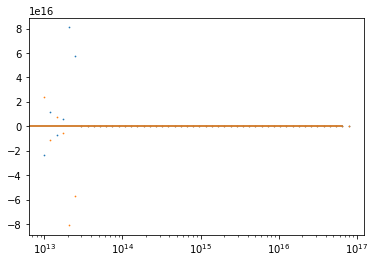

In [5]:
plt.scatter(r, pops[:,0]/abun, s=.5)
plt.scatter(r, pops[:,1]/abun, s=.5)

plt.plot(ra, lp0)
plt.plot(ra, lp1)


plt.xscale('log')
# plt.yscale('log')

In [9]:
np.array(model.geometry.points.position)

array([[1.00000000e+13, 0.00000000e+00, 0.00000000e+00],
       [1.09474781e+13, 0.00000000e+00, 0.00000000e+00],
       [1.19847278e+13, 0.00000000e+00, 0.00000000e+00],
       [1.31202545e+13, 0.00000000e+00, 0.00000000e+00],
       [1.43633700e+13, 0.00000000e+00, 0.00000000e+00],
       [1.57242679e+13, 0.00000000e+00, 0.00000000e+00],
       [1.72141079e+13, 0.00000000e+00, 0.00000000e+00],
       [1.88451070e+13, 0.00000000e+00, 0.00000000e+00],
       [2.06306397e+13, 0.00000000e+00, 0.00000000e+00],
       [2.25853478e+13, 0.00000000e+00, 0.00000000e+00],
       [2.47252601e+13, 0.00000000e+00, 0.00000000e+00],
       [2.70679245e+13, 0.00000000e+00, 0.00000000e+00],
       [2.96325512e+13, 0.00000000e+00, 0.00000000e+00],
       [3.24401706e+13, 0.00000000e+00, 0.00000000e+00],
       [3.55138059e+13, 0.00000000e+00, 0.00000000e+00],
       [3.88786614e+13, 0.00000000e+00, 0.00000000e+00],
       [4.25623296e+13, 0.00000000e+00, 0.00000000e+00],
       [4.65950173e+13, 0.00000

In [10]:
np.array(model.geometry.rays.direction)

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.99948622,  0.03205158,  0.        ],
       [ 0.99794539,  0.06407022,  0.        ],
       [ 0.99537911,  0.09602303,  0.        ],
       [ 0.99179001,  0.12787716,  0.        ],
       [ 0.98718178,  0.1595999 ,  0.        ],
       [ 0.98155916,  0.19115863,  0.        ],
       [ 0.97492791,  0.22252093,  0.        ],
       [ 0.96729486,  0.25365458,  0.        ],
       [ 0.95866785,  0.28452759,  0.        ],
       [ 0.94905575,  0.31510822,  0.        ],
       [ 0.93846842,  0.34536505,  0.        ],
       [ 0.92691676,  0.375267  ,  0.        ],
       [ 0.91441262,  0.40478334,  0.        ],
       [ 0.90096887,  0.43388374,  0.        ],
       [ 0.88659931,  0.46253829,  0.        ],
       [ 0.8713187 ,  0.49071755,  0.        ],
       [ 0.85514276,  0.51839257,  0.        ],
       [ 0.8380881 ,  0.5455349 ,  0.        ],
       [ 0.82017225,  0.57211666,  0.        ],
       [ 0.80141362,  0.59811053,  0.   

In [11]:
model.parameters.spherical_symmetry()

True

In [12]:
np.array(model.geometry.rays.antipod)

array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=uint32)

In [13]:
sum(np.array(model.geometry.rays.weight))

0.99999999999999977123

In [34]:
Jeff = np.array(model.lines.lineProducingSpecies[0].Jeff).ravel()

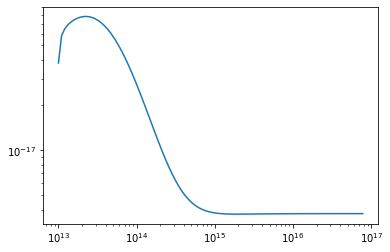

In [35]:
plt.plot(rs, Jeff)
plt.yscale('log')
plt.xscale('log')

In [17]:
I = np.array(model.radiation.I)
J = np.array(model.radiation.J)

In [37]:
I.shape

(100, 100, 15)

In [23]:
wt = np.array(model.geometry.rays.weight)

In [32]:
sum(I[:,-1,-1] * wt)

3.772803340446483841e-18

In [28]:
J[0]

array([3.77282562e-18, 3.77425627e-18, 3.92481634e-18, 8.15400194e-18,
       3.96115101e-17, 5.95616022e-17, 3.72080548e-17, 2.76795468e-17,
       3.72079863e-17, 5.95615489e-17, 3.96116615e-17, 8.15403083e-18,
       3.92480449e-18, 3.77423942e-18, 3.77280492e-18], dtype=float128)

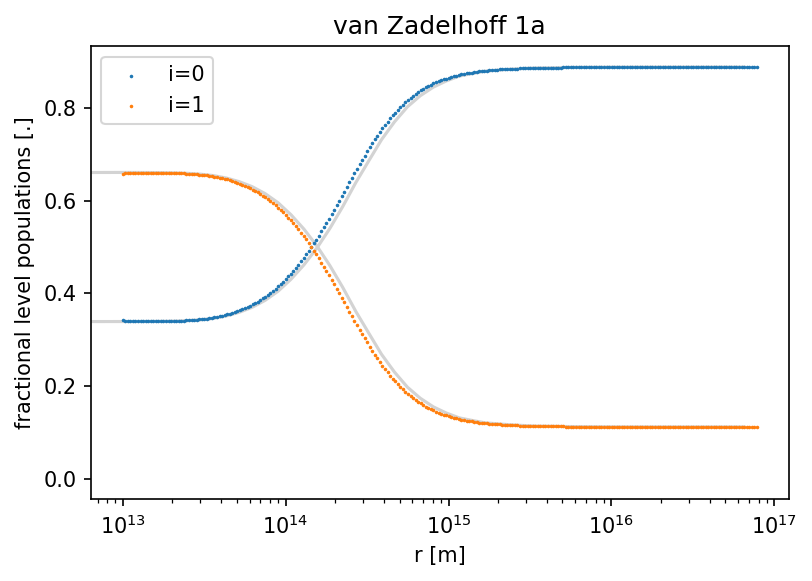

In [45]:
fig = plt.figure(dpi=150)
plt.title('van Zadelhoff 1a')
plt.scatter(rs, pops[:,0]/abun, s=0.5, label='i=0', zorder=1)
plt.scatter(rs, pops[:,1]/abun, s=0.5, label='i=1', zorder=1)
plt.plot(ra, lp0, c='lightgray', zorder=0)
plt.plot(ra, lp1, c='lightgray', zorder=0)
plt.xscale('log')
plt.legend()
plt.xlabel('r [m]')
plt.ylabel('fractional level populations [.]')
plt.savefig(f'here.png')

In [48]:
with open(f'test.log' ,'w') as log:
    log.write('test\n')
    log.write('ege')